### Librerías

In [2]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import time
from collections import Counter
from math import sqrt
import seaborn as sns
from tqdm import tqdm
import random
import os
from pandas.core.algorithms import unique

## Metodología

### Recolectar

### Lectura

In [3]:
df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### Preparar

#### Función para calcular el número de atributos y los atributos contenidos en el dataframe

In [4]:
def Numero_atributos(df_na):
    num_atributos_ = df_na.shape[1]    #número de columnas
    atributos_ = list(df_na.columns)   #extrae columnas-->lista

    print(f'El dataset tiene {num_atributos_} atributos:')
    
    for i in range(num_atributos_):   
        print(f'{i+1}.- {atributos_[i]} ')
    return num_atributos_, atributos_

#### Función para obtener los atributos, sus observaciones y el tipo de atributo

In [5]:
def Observaciones(df_o, atributos_o):
    observaciones_ = {}
    for i, atributo in enumerate(atributos_o):
        obs_ = df_o[atributo].value_counts() #Return a Series containing counts of unique values.
        obs_l_ = list(obs_.index)            #Lista de los valores únicos encontrados
        obs_ = pd.DataFrame(obs_.index)      

        tipo = df_o[atributo].dtypes

        if tipo == 'object': tipo = 'categórico'
        elif tipo == 'int': tipo = 'entero'
        elif tipo == 'float64': tipo = 'flotante'

        print(f'''El atributo {atributo} es de tipo {tipo}, contiene {len(obs_l_)} observaciones y son las siguientes:
        {obs_l_}
              ''')
        observaciones_.update({atributo:obs_})    
    return observaciones_

#### Función para calcular el número de instancias

In [6]:
def Numero_instancias(df_ni):
    num_instancias_ = df_ni.shape[0]
    print(f'El dataset tiene {num_instancias_} instancias')
    return num_instancias_

#### Función para conocer el número de datos faltantes

In [7]:
def Datos_Faltantes(df_):
    faltantes_df = df_.isnull().sum()
    print(f'Datos faltantes por atributo:\n {faltantes_df}')
    #return faltantes_df

In [8]:
def Distribucion(df_, atributo_, atributo_d):
    fig, ax = plt.subplots(figsize = (10,8))
    sns.histplot(data = df_, x = atributo_,ax = ax, kde=True, element = 'step')
    plt.title(f'Distribución de {atributo_}', fontsize = 18)
    ax.set_xlabel(atributo_)
    ax.set_ylabel("Frecuencia")
    plt.show()

In [9]:
num_atributos, atributos = Numero_atributos(df)

El dataset tiene 23 atributos:
1.- class 
2.- cap-shape 
3.- cap-surface 
4.- cap-color 
5.- bruises 
6.- odor 
7.- gill-attachment 
8.- gill-spacing 
9.- gill-size 
10.- gill-color 
11.- stalk-shape 
12.- stalk-root 
13.- stalk-surface-above-ring 
14.- stalk-surface-below-ring 
15.- stalk-color-above-ring 
16.- stalk-color-below-ring 
17.- veil-type 
18.- veil-color 
19.- ring-number 
20.- ring-type 
21.- spore-print-color 
22.- population 
23.- habitat 


In [10]:
num_instancias = Numero_instancias(df)

El dataset tiene 8124 instancias


In [11]:
observaciones = Observaciones(df, atributos)

El atributo class es de tipo categórico, contiene 2 observaciones y son las siguientes:
        ['e', 'p']
              
El atributo cap-shape es de tipo categórico, contiene 6 observaciones y son las siguientes:
        ['x', 'f', 'k', 'b', 's', 'c']
              
El atributo cap-surface es de tipo categórico, contiene 4 observaciones y son las siguientes:
        ['y', 's', 'f', 'g']
              
El atributo cap-color es de tipo categórico, contiene 10 observaciones y son las siguientes:
        ['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'u', 'r']
              
El atributo bruises es de tipo categórico, contiene 2 observaciones y son las siguientes:
        ['f', 't']
              
El atributo odor es de tipo categórico, contiene 9 observaciones y son las siguientes:
        ['n', 'f', 'y', 's', 'a', 'l', 'p', 'c', 'm']
              
El atributo gill-attachment es de tipo categórico, contiene 2 observaciones y son las siguientes:
        ['f', 'a']
              
El atributo gil

In [12]:
Datos_Faltantes(df)

Datos faltantes por atributo:
 class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [13]:
df.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

#### Funciones estadísticas

In [14]:
def moda(atributo_):
    moda_1 = atributo_.value_counts()
    moda_ = list(moda_1.index)
    return moda_[0]

In [15]:
def maximo(columna_):
    r = len(columna_)
    valor_maximo_ = columna_[0]
    for n in range(1, r):
        k = columna_[n]
        if valor_maximo_ < k:
            valor_maximo_ = k
    return valor_maximo_

In [16]:
def minimo(columna_):
    r = len(columna_)
    valor_minimo_ = columna_[0]
    for n in range(1, r):
        k = columna_[n]
        if valor_minimo_ > k:
            valor_minimo_ = k
    return valor_minimo_

In [17]:
def media(columna_):
    r = len(columna_)
    sumatoria = 0
    for i in range(r):
        sumatoria += columna_[i]
    media_ = sumatoria / r
    return media_

In [18]:
def desviacion_estandar(columna_): #s
    r = len(columna_)
    media_columna = media(columna_)
    sumatoria = 0
    for i in range(r):
        s = columna_[i] - media_columna
        s = s**2
        sumatoria += s
    s = sumatoria / (r - 1)
    s = s ** (1/2)
    return s

In [19]:
def varianza(columna_): #s2
    r = len(columna_)
    media_columna = media(columna_)
    sumatoria = 0
    for i in range(r):
        s = columna_[i] - media_columna
        s = s**2
        sumatoria += s
    s_2 = sumatoria / (r - 1)
    return s_2

In [20]:
def estadistica(atributo_):
    mod = moda(atributo_)
    max = maximo(atributo_)
    min = minimo(atributo_)
    med = media(atributo_)
    std = desviacion_estandar(atributo_)
    var = varianza(atributo_)
    return mod, max, min, med, std, var

In [21]:
def cuartiles(df_, atributo_):
#1. 25% de los datos es menor que o igual a este valor.
#2. La mediana. 50% de los datos es menor que o igual a este valor.
#3. 75% de los datos es menor que o igual a este valor.
#rango intercuartil. La distancia entre el primer 1er cuartil y el 3er 
#cuartil (Q3-Q1); de esta manera, abarca el 50% central de los datos.

#ordenar los elementos de la columna
    v = df_[atributo_]
    v = np.asarray(v.sort_values())
    n = len(v)
    if n % 2 == 0:
        #calcular cuartil uno 
        a = int(n/4) 
        q1 = v[a]
        #calcular cuartil dos
        b = (n)/2
        c = b - 1
        q2 = (v[b] + v[c])/2
        #calcular cuartil tres
        d = int((3*n)/4)
        q3 = v[d]
    else:
        #calcular cuartil dos
        b = int(n/2)
        q2 = v[b]
    
        if b % 2 == 0:
            #calcular cuartil uno 
            a = int(n/4) 
            q1 = (v[a] + v[a-1])/2
            #calcular cuartil tres 
            d = int((3*(n))/4) 
            q3 = (v[a] + v[d-1])/2
        else:
            #calcular cuartil uno 
            a = int(n/4) 
            q1 = v[a]
            #calcular cuartil tres
            d = int((3*n)/4)
            q3 = v[d]
    print(f'Q1: {q1}, Q2: {q2}, Q3: {q3}')
    return q1, q2, q3

In [22]:
def outlier(df_,atributo_):
    v = df_[atributo_]
    q1, q2, q3 = cuartiles(df_,atributo_)
    out = []
    for valor in v:
        if valor < q1:
            if abs(valor-q1) > 1.5*(q3-q1):
                out.append(valor)
        if valor > q3:
            if abs(valor-q3) > 1.5*(q3-q1):
                out.append(valor)
    
    if len(out) == 0:
        print(f'No existen valores atípicos en el atributo {atributo_}')
    else:
        print(f'Se encontraron {len(out)} valores atípicos')
        print(f'Los valores atípicos encontrados son: {np.asarray(out)}')
    return out

In [23]:
def Balance_clases(df):
    atributo_d = input('¿Cuál es tu atributo de decisión?:')
    clases = df[atributo_d]
    cl = clases.value_counts() 
    cl_ = list(cl.index)

    porcentajes_ = (cl*100)/sum(cl)
    print(porcentajes_)

    print(f'El dataset cuenta con {len(cl_)} clases y son las siguientes: {cl_}')

In [24]:
Balance_clases(df)

¿Cuál es tu atributo de decisión?: class


e    51.797144
p    48.202856
Name: class, dtype: float64
El dataset cuenta con 2 clases y son las siguientes: ['e', 'p']


#### Valor faltante ? --> Nan

In [25]:
df['stalk-root'] = df['stalk-root'].replace('?', np.NaN)

In [26]:
df['stalk-root'].isnull().sum()

2480

Calcular porcentaje de valores faltantes

In [27]:
def valores_faltantes(dataset):
    missing_values_count = dataset.isnull().sum()
    total_missing = missing_values_count.sum() 
    #Porcentaje de datos faltantes
    total_missing_porcent = total_missing/(np.product(dataset.shape))*100
    print('Porcentaje total de valores faltantes:',total_missing_porcent,'%')
    print('')
    print('Porcentaje de valores faltantes de cada atributo:')
    for col in dataset.columns:
        VP_missing = np.mean(dataset[col].isnull())
        print('{} - {}%'.format(col,(VP_missing*100))) 

In [28]:
valores_faltantes(df)

Porcentaje total de valores faltantes: 1.3272536552993814 %

Porcentaje de valores faltantes de cada atributo:
class - 0.0%
cap-shape - 0.0%
cap-surface - 0.0%
cap-color - 0.0%
bruises - 0.0%
odor - 0.0%
gill-attachment - 0.0%
gill-spacing - 0.0%
gill-size - 0.0%
gill-color - 0.0%
stalk-shape - 0.0%
stalk-root - 30.526834071885773%
stalk-surface-above-ring - 0.0%
stalk-surface-below-ring - 0.0%
stalk-color-above-ring - 0.0%
stalk-color-below-ring - 0.0%
veil-type - 0.0%
veil-color - 0.0%
ring-number - 0.0%
ring-type - 0.0%
spore-print-color - 0.0%
population - 0.0%
habitat - 0.0%


In [29]:
df.isnull().sum()/df.shape[0]*100

class                        0.000000
cap-shape                    0.000000
cap-surface                  0.000000
cap-color                    0.000000
bruises                      0.000000
odor                         0.000000
gill-attachment              0.000000
gill-spacing                 0.000000
gill-size                    0.000000
gill-color                   0.000000
stalk-shape                  0.000000
stalk-root                  30.526834
stalk-surface-above-ring     0.000000
stalk-surface-below-ring     0.000000
stalk-color-above-ring       0.000000
stalk-color-below-ring       0.000000
veil-type                    0.000000
veil-color                   0.000000
ring-number                  0.000000
ring-type                    0.000000
spore-print-color            0.000000
population                   0.000000
habitat                      0.000000
dtype: float64

Distribución de atributo con valores faltantes

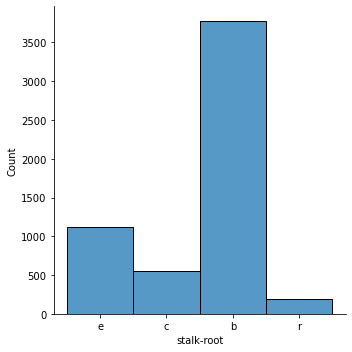

In [30]:
sns.displot(df['stalk-root'])

## Imputación Hot Deck

In [31]:
def coincidencia(valor):
    if valor is np.nan:
        return False
    else: 
        return True

In [32]:
def recorrido(dataset,columna,numero):
    Total = len(dataset[columna])
    for index, row in dataset.iterrows():
        if index == numero:
            valor = row[columna]
            condicion = coincidencia(valor)
            if condicion == False:
                numero = np.random.randint(0, Total)
                recorrido(dataset,columna, numero)
            if condicion == True:      
                print('Valor Aleatorio  -----  Indice :',index, ', Valor del registro: ',row[columna])
                return index

In [33]:
def Imputacion_HotDeck(columna,Copy_hotdeck):
    missing_values_count = Copy_hotdeck[columna].isnull().sum()
    total_missing = missing_values_count.sum() 
    print(total_missing)
    Total = len(Copy_hotdeck[columna])
    numero = np.random.randint(0, Total)
    V=[] #valores de la columna 
    IA = [] #index aleatorio
    I =[]
    for index, row in Copy_hotdeck.iterrows():
        V.append(row[columna])
    Indice= recorrido(Copy_hotdeck, columna,numero)
    IA.append(Indice) #Guarda el indice aleatorio
    print('Lista de valores de la columna:')
    print(V)
    print('')
    for i in range(len(V)): #Recorrido de los indices de la columna
        if i == IA[0]: #Si el indice coincide con el indice aleatorio
            #print(V[i]) #comprobar que el valor coincida con el valor del registro
            for i in (V[i:]): #Recorrido de los valores desde el indice aleatorio
                I.append(i) #Lista de valores secuenciales al valor aleatorio propuesto
    while len(I)<(int(total_missing)*2): #Si la cantidad de valores no es mayor al doble de P50 
        for i in (V[:Total]): #Recorrido de los valores desde el indice aleatorio
            I.append(i) #Lista de valores secuenciales al valor aleatorio propuesto
    print('Lista de valores secuenciales al valor aleatorio propuesto:')
    print(I)
    I.pop(0) #Eliminación del primer valor de la lista
    print('Lista de valores secuenciales al valor aleatorio propuesto:')
    print(I)
    print('')
    newlist = [x for x in I if pd.isnull(x) == False] #Lista de valores secuenciales al valor aleatorio propuesto sin valores faltantes
    print('Lista de valores secuenciales al valor aleatorio propuesto sin valores faltantes:')
    print(len(newlist), newlist)
    print('')
    for n, i in enumerate(V):
        if i is np.nan: #Encontrar la posición que contenga valor nan
            V[n] = newlist[0] #Reemplazar el valor nan por el primer valor de lista newlist
            newlist.pop(0) #Eliminar el primer valor de la lista de valores secuenciales al valor aleatorio propuesto sin valores faltantes
    print('Sustitución de los valores en la lista original')
    print(V)
    print('')
    Copy_hotdeck[columna] = V
    return Copy_hotdeck

In [34]:
Copy_HD =  df.copy()
df_imp_HD = Imputacion_HotDeck('stalk-root',Copy_HD)

2480
Valor Aleatorio  -----  Indice : 1230 , Valor del registro:  e
Lista de valores de la columna:
['e', 'c', 'c', 'e', 'e', 'c', 'c', 'c', 'e', 'c', 'c', 'c', 'c', 'e', 'e', 'e', 'e', 'e', 'e', 'e', 'c', 'e', 'c', 'c', 'c', 'e', 'c', 'c', 'e', 'b', 'c', 'e', 'c', 'r', 'c', 'b', 'e', 'e', 'b', 'c', 'c', 'r', 'e', 'e', 'c', 'c', 'c', 'c', 'r', 'r', 'r', 'c', 'c', 'e', 'e', 'c', 'e', 'c', 'c', 'r', 'e', 'c', 'c', 'c', 'c', 'e', 'c', 'r', 'c', 'e', 'b', 'c', 'b', 'r', 'c', 'b', 'b', 'r', 'e', 'r', 'e', 'e', 'e', 'e', 'r', 'e', 'c', 'c', 'r', 'e', 'e', 'c', 'c', 'c', 'e', 'c', 'r', 'c', 'c', 'c', 'e', 'c', 'r', 'r', 'c', 'c', 'r', 'c', 'c', 'c', 'c', 'e', 'b', 'c', 'e', 'r', 'e', 'r', 'b', 'e', 'e', 'c', 'e', 'e', 'c', 'e', 'c', 'e', 'c', 'c', 'c', 'c', 'b', 'c', 'b', 'e', 'b', 'c', 'e', 'c', 'r', 'c', 'e', 'r', 'c', 'e', 'e', 'c', 'c', 'c', 'c', 'e', 'c', 'e', 'b', 'r', 'c', 'c', 'c', 'c', 'c', 'c', 'e', 'r', 'c', 'r', 'c', 'c', 'r', 'c', 'e', 'c', 'b', 'c', 'r', 'c', 'c', 'c', 'c', 'c',

In [35]:
df_imp_HD['stalk-root']

0       e
1       c
2       c
3       e
4       e
       ..
8119    b
8120    b
8121    b
8122    b
8123    b
Name: stalk-root, Length: 8124, dtype: object

### Distribución posterior a la imputación Hot Deck

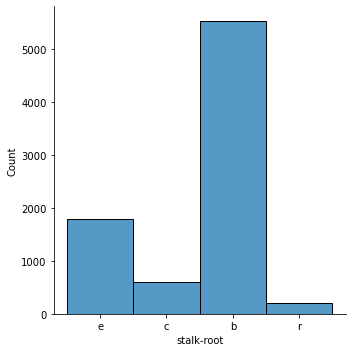

In [36]:
sns.displot(df_imp_HD['stalk-root'])

In [37]:
df_nn = df_imp_HD.copy()
df_nn.isnull().sum()/df_nn.shape[0]*100

class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-shape                 0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64

## Imputación aleatoria

In [38]:
def imputacion_aleatoria(df_aleat, atributo_):
    df_a = df_aleat.copy()
    faltantes_df = df_a[atributo_].isnull().sum()
    no_faltantes = df_a[df_a[atributo_].notnull()]

    min = no_faltantes[atributo_].min()
    max = no_faltantes[atributo_].max()
    
    tipo = df_a[atributo_].dtypes
    print(tipo)
    if tipo == 'O': 
        random_string_list = []
        for i, atributo in enumerate(atributo_):
            obs_ = df_a[atributo_].value_counts() #Return a Series containing counts of unique values.
            obs_l_ = list(obs_.index)            #Lista de los valores únicos encontrados
        for i in range(faltantes_df):
            x = random.choices(obs_l_)
            # random_string_list.append(x)
            #df_a.loc[df_a[atributo_].isnull(),atributo_] = random_string_list
            df_a.loc[df_a[atributo_].isnull(),atributo_] = x
   
    elif tipo == 'int64': 
        random_int_list = []
        for i in range(faltantes_df):
            x = random.radint(min,max)
            random_int_list.append(x)
        df_a.loc[df_a[atributo_].isnull(),atributo_] = random_int_list

    elif tipo == 'float64': 
        random_float_list = []
        for i in range(faltantes_df):
            x = round(random.uniform(min,max),2)
            random_float_list.append(x)
        df_a.loc[df_a[atributo_].isnull(),atributo_] = random_float_list

    return df_a

In [39]:
df_imp_aleat = imputacion_aleatoria(df,'stalk-root')

object


### Distribución posterior a la imputación aleatoria

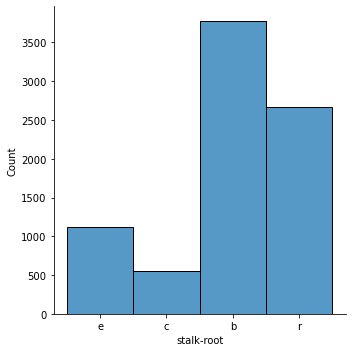

In [40]:
sns.displot(df_imp_aleat['stalk-root'])

In [41]:
df_imp_aleat['stalk-root'].isnull().sum()

0

In [42]:
df_n = df_imp_aleat.copy()

In [43]:
df_n.isnull().sum()/df_n.shape[0]*100

class                       0.0
cap-shape                   0.0
cap-surface                 0.0
cap-color                   0.0
bruises                     0.0
odor                        0.0
gill-attachment             0.0
gill-spacing                0.0
gill-size                   0.0
gill-color                  0.0
stalk-shape                 0.0
stalk-root                  0.0
stalk-surface-above-ring    0.0
stalk-surface-below-ring    0.0
stalk-color-above-ring      0.0
stalk-color-below-ring      0.0
veil-type                   0.0
veil-color                  0.0
ring-number                 0.0
ring-type                   0.0
spore-print-color           0.0
population                  0.0
habitat                     0.0
dtype: float64

# Codificación categórico-numérico

In [44]:
columnas = df_n.columns.values
elementos_columnas = {}

for c in columnas:
    elementos_columnas[c] = df_n[c].unique()

In [45]:
for c in columnas:
    if c != 'veil-type':
        df_n[c] = df_imp_aleat[c].replace(elementos_columnas[c],
                          np.arange(elementos_columnas[c].shape[0]))
    else:
        df_n['veil-type'] = df_imp_aleat['veil-type'].replace('p',1)
df_n.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,1,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,1,0,0,1,1,2,1
5,1,0,1,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,1,1
6,1,1,0,2,0,1,0,0,1,2,...,0,0,0,1,0,0,0,0,1,2
7,1,1,1,2,0,2,0,0,1,1,...,0,0,0,1,0,0,0,1,0,2
8,0,0,1,2,0,0,0,0,0,3,...,0,0,0,1,0,0,0,0,3,1
9,1,1,0,1,0,1,0,0,1,2,...,0,0,0,1,0,0,0,0,0,2


Identificación de outliers

<AxesSubplot:>

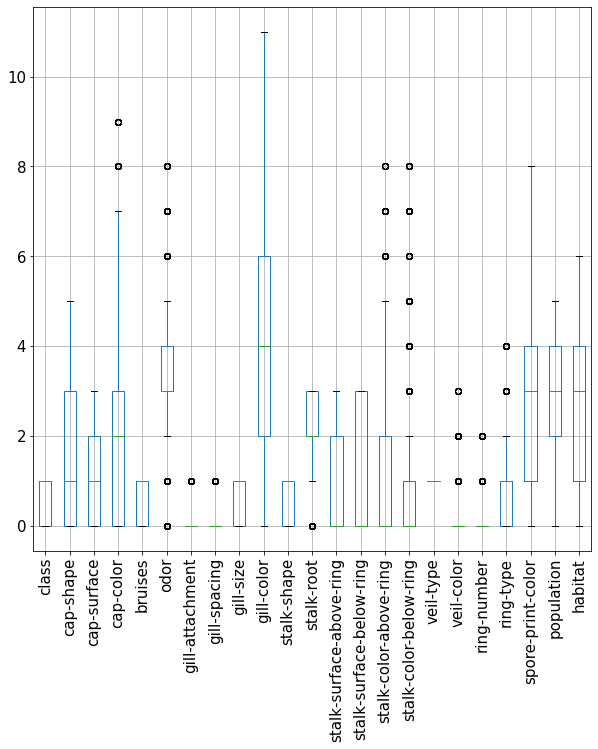

In [46]:
df_n.boxplot(rot=90, fontsize=15,figsize = (10,10))

Normalización de los datos

In [47]:
def norm_min_max(datos):
    lim_sup = []
    lim_inf = []
    rangoDatos =[]
    maxNorm = 1
    minNorm = 0
    rango = maxNorm - minNorm
    for i in range (0,datos.columns.size):
        lim_sup.append(datos.iloc[:,i].max())
        lim_inf.append(datos.iloc[:,i].min())
        rangoDatos.append(lim_sup[i] - lim_inf[i])
    nombres = datos.columns.values.tolist()
    datosNorm = pd.DataFrame(columns = nombres)

    for j in range(len(datos.columns)):
        varNorm = []
        var = datos.iloc[:,j]
        for i in range(len(datos)):
            D = var[i] - lim_inf[j]
            DPct = D/rangoDatos[j]
            dNorm = rango*DPct
            varNorm.append(minNorm+dNorm)
        datosNorm.iloc[:,j] = varNorm
    datos = datosNorm
    return datos

In [48]:
df_n

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,1,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,1,0,0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,4,0,0,1,3,1,0,1,10,...,0,6,7,1,2,0,0,8,5,6
8120,1,0,0,0,1,3,1,0,1,10,...,0,6,7,1,1,0,0,8,3,6
8121,1,3,0,0,1,3,1,0,1,1,...,0,6,7,1,2,0,0,8,5,6
8122,0,4,1,0,1,6,0,0,0,8,...,3,0,0,1,0,0,1,4,3,6


In [48]:
observaciones = Observaciones(df_n, atributos)

El atributo class es de tipo entero, contiene 2 observaciones y son las siguientes:
        [1, 0]
              
El atributo cap-shape es de tipo entero, contiene 6 observaciones y son las siguientes:
        [0, 3, 4, 1, 2, 5]
              
El atributo cap-surface es de tipo entero, contiene 4 observaciones y son las siguientes:
        [1, 0, 2, 3]
              
El atributo cap-color es de tipo entero, contiene 10 observaciones y son las siguientes:
        [0, 3, 4, 1, 2, 6, 5, 8, 7, 9]
              
El atributo bruises es de tipo entero, contiene 2 observaciones y son las siguientes:
        [1, 0]
              
El atributo odor es de tipo entero, contiene 9 observaciones y son las siguientes:
        [3, 4, 6, 7, 1, 2, 0, 5, 8]
              
El atributo gill-attachment es de tipo entero, contiene 2 observaciones y son las siguientes:
        [0, 1]
              
El atributo gill-spacing es de tipo entero, contiene 2 observaciones y son las siguientes:
        [0, 1]
       

No se requiere normalizar, dado que, los valores numéricos son del tipo categórico

In [49]:
d_S = df_n.loc[:,['cap-shape','cap-surface','cap-color','odor','gill-color','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-color','ring-number','ring-type','spore-print-color','population','habitat']]
CD_S = df_n.loc[:,['class','bruises','gill-attachment','gill-spacing','gill-size','stalk-shape','veil-type']]
datos_norm = norm_min_max(d_S)
datos = pd.concat([datos_norm, CD_S], axis=1)
datos

,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,...,spore-print-color,population,habitat,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,veil-type
0,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.0,0.00,0.000,...,0.000,0.0,0.000000,0,0,0,0,0,0,1
1,0.0,0.000000,0.111111,0.125,0.000000,0.333333,0.0,0.0,0.00,0.000,...,0.125,0.2,0.166667,1,0,0,0,1,0,1
2,0.2,0.000000,0.222222,0.250,0.090909,0.333333,0.0,0.0,0.00,0.000,...,0.125,0.2,0.333333,1,0,0,0,1,0,1
3,0.0,0.333333,0.222222,0.000,0.090909,0.000000,0.0,0.0,0.00,0.000,...,0.000,0.0,0.000000,0,0,0,0,0,0,1
4,0.0,0.000000,0.333333,0.375,0.000000,0.000000,0.0,0.0,0.00,0.000,...,0.125,0.4,0.166667,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.8,0.000000,0.000000,0.375,0.909091,0.666667,0.0,0.0,0.75,0.875,...,1.000,1.0,1.000000,1,1,1,0,1,0,1
8120,0.0,0.000000,0.000000,0.375,0.909091,0.666667,0.0,0.0,0.75,0.875,...,1.000,0.6,1.000000,1,1,1,0,1,0,1
8121,0.6,0.000000,0.000000,0.375,0.090909,0.666667,0.0,0.0,0.75,0.875,...,1.000,1.0,1.000000,1,1,1,0,1,0,1
8122,0.8,0.333333,0.000000,0.750,0.727273,0.666667,0.0,1.0,0.00,0.000,...,0.500,0.6,1.000000,0,1,0,0,0,1,1


### Analizar

Distribución de la información por atributo

In [50]:
datos.describe()[1:].style.background_gradient(cmap='Blues')

,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,veil-type
mean,0.327523,0.323978,0.232617,0.448671,0.388568,0.559823,0.220253,0.331528,0.143710,0.132693,0.012802,0.041359,0.174052,0.275111,0.537568,0.465780,0.517971,0.584441,0.025849,0.161497,0.690793,0.567208,1.000000
std,0.317794,0.258511,0.193866,0.194714,0.242696,0.245142,0.302936,0.444366,0.195443,0.206074,0.085946,0.145558,0.196733,0.217778,0.276240,0.269591,0.499708,0.492848,0.158695,0.368011,0.462195,0.495493,0.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.375000,0.181818,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.400000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.200000,0.333333,0.222222,0.375000,0.363636,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.375000,0.600000,0.500000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,0.600000,0.666667,0.333333,0.500000,0.545455,0.666667,0.666667,1.000000,0.250000,0.125000,0.000000,0.000000,0.250000,0.500000,0.800000,0.666667,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


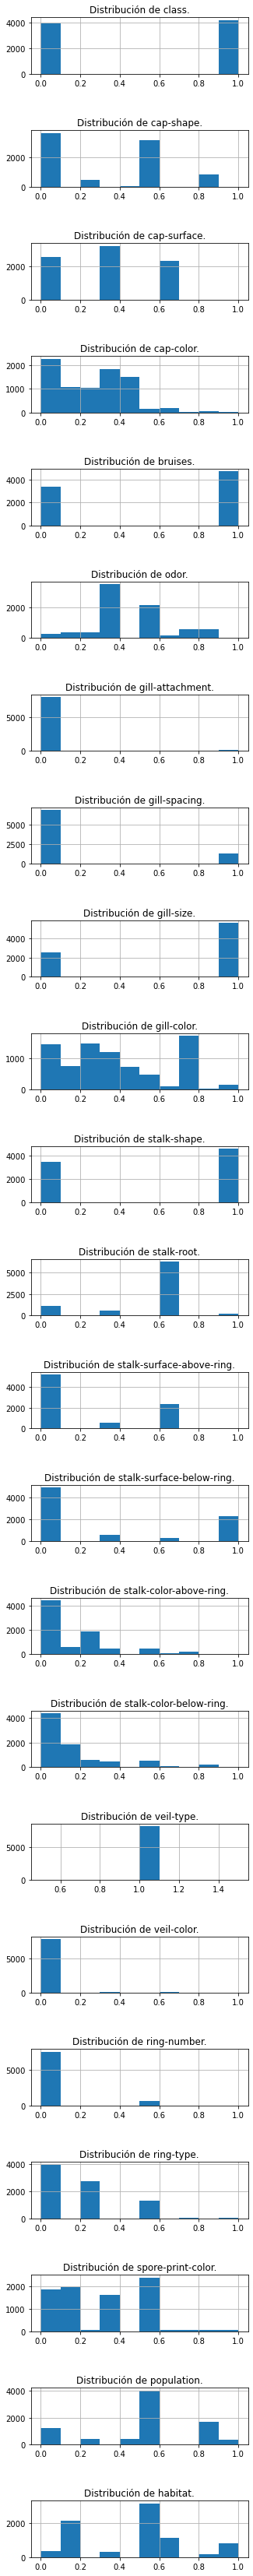

In [51]:
fig, axs = plt.subplots(df_n.shape[1], 1, figsize = (5,60))
plt.subplots_adjust(hspace = 1)
for i, c in enumerate(columnas):
  dist_datos = datos[c]
  axs[i].set_title(f'Distribución de {c}.')
  axs[i].hist(dist_datos)
  axs[i].grid(True)

#### Reducción de dimensionalidad (PCA)

Encontrar la matriz de covarianza y sus respectivos eigenvectores y eigenvalores 

In [52]:
def matriz_cov(data):
    atributos = data.columns 
    n = len(atributos)
    m = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            X = data[atributos[i]]
            Y = data[atributos[j]]
            m[i][j] = (((X-X.mean())*(Y-Y.mean())).sum())/(len(X)-1)
    return m

In [53]:
def PCA(datos,col_decision):
    datos1 = datos.drop([col_decision],axis=1) #Eliminando el atributo de decisión 
    #Ajustar los datos restando la media a cada atributo
    datos_A = pd.DataFrame(columns=datos1.columns,index=range(len(datos1)))
    for i in datos_A.columns:
        datos_A[i] = datos1[i] - datos1[i].mean()    
    #datos_A  
    matrix = matriz_cov(datos_A)  
    #sns.heatmap(matrix)  
    L,V =  np.linalg.eig(matrix)  
    #Obtener el porcentaje de covarianza de cada uno de los atributos
    total = L.sum()
    p = (L/total)*100
    pca =[]
    names =[]
    columnas1 = datos_A.columns.values
    for index, row in enumerate(p):
        print(columnas1[index] + ':',row)  
        names.append(columnas1[index])
    return names,p

In [54]:
col_decision = 'class'
n,p = PCA(datos,col_decision)

cap-shape: 27.40495653790761
cap-surface: 19.01153555882489
cap-color: 13.90187346746259
odor: 8.85252526224034
gill-color: 6.22999235892167
stalk-root: 4.9469055623275615
stalk-surface-above-ring: 3.75568357450165
stalk-surface-below-ring: 2.9610619419848865
stalk-color-above-ring: 2.608745276888346
stalk-color-below-ring: 1.9070076216095295
veil-color: 1.7422014949108233
ring-number: 1.376831487798948
ring-type: 1.2051250379480107
spore-print-color: 1.0793678937225972
population: 0.07687156760204514
habitat: 0.21953536430587267
bruises: 0.2932014632553628
gill-attachment: 0.7610475928684448
gill-spacing: 0.4669179330019071
gill-size: 0.6159387194790199
stalk-shape: 0.5826742824379169
veil-type: 0.0


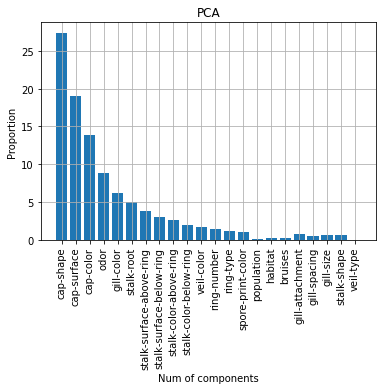

In [55]:
index = np.arange(len(p))
plt.bar(n, p)
plt.title('PCA')
plt.xlabel('Num of components')
plt.xticks(rotation = 90)
plt.ylabel('Proportion')
plt.grid(True)

### PCA muesttra que los únicos atributos que aportan mayor información son 9 atributos: 

    cap-shape: 27.404956537907605
    cap-surface: 19.011535558824942
    cap-color: 13.901873467462543
    odor: 8.85252526224034
    gill-color: 6.229992358921653
    stalk-root: 4.946905562327567
    stalk-surface-above-ring: 3.75568357450165
    stalk-surface-below-ring: 2.96106194198489
    stalk-color-above-ring: 2.6087452768883486

In [56]:
df_pca = datos.loc[:,['class','cap-shape','cap-surface','cap-color','odor','gill-color','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring']]
#df_pca = datos[datos.columns[1:10]]

In [57]:
df_pca

,class,cap-shape,cap-surface,cap-color,odor,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring
0,0,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.0,0.0,0.00
1,1,0.0,0.000000,0.111111,0.125,0.000000,0.333333,0.0,0.0,0.00
2,1,0.2,0.000000,0.222222,0.250,0.090909,0.333333,0.0,0.0,0.00
3,0,0.0,0.333333,0.222222,0.000,0.090909,0.000000,0.0,0.0,0.00
4,1,0.0,0.000000,0.333333,0.375,0.000000,0.000000,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...
8119,1,0.8,0.000000,0.000000,0.375,0.909091,0.666667,0.0,0.0,0.75
8120,1,0.0,0.000000,0.000000,0.375,0.909091,0.666667,0.0,0.0,0.75
8121,1,0.6,0.000000,0.000000,0.375,0.090909,0.666667,0.0,0.0,0.75
8122,0,0.8,0.333333,0.000000,0.750,0.727273,0.666667,0.0,1.0,0.00


####  División de los conjuntos de entrenamiento y prueba sin PCA

In [54]:
def method_8020(x,y):
    train_x = x[0 : int(len(x)*0.8)]
    train_y = y[0 : int(len(y)*0.8)]
    test_x = x[int(len(x)*0.8) : ]
    test_y = y[int(len(y)*0.8) : ]
    return train_x, train_y, test_x, test_y

In [55]:
x = df_n.drop(['class'],axis=1) #Eliminando el atributo de decisión 
y = df_n['class']
x_train, y_train, x_test, y_test = method_8020(x,y)

In [56]:
print('Total de train X:',len(x_train))
print('Total de train Y:',len(y_train))
print('Total de test X:',len(x_test))
print('Total de test Y:',len(y_test))

Total de train X: 6499
Total de train Y: 6499
Total de test X: 1625
Total de test Y: 1625


####  División de los conjuntos de entrenamiento y prueba utilizando PCA

In [52]:
def method_8020(x,y):
    train_x = x[0 : int(len(x)*0.8)]
    train_y = y[0 : int(len(y)*0.8)]
    test_x = x[int(len(x)*0.8) : ]
    test_y = y[int(len(y)*0.8) : ]
    return train_x, train_y, test_x, test_y

In [53]:
x_ = df_pca.drop(['class'],axis=1) #Eliminando el atributo de decisión 
y_ = df_pca['class']
train_x, train_y, test_x, test_y = method_8020(x_,y_)

NameError: name 'df_pca' is not defined

In [63]:
print('Total de train X:',len(train_x))
print('Total de train Y:',len(train_y))
print('Total de test X:',len(test_x))
print('Total de test Y:',len(test_y))

Total de train X: 6499
Total de train Y: 6499
Total de test X: 1625
Total de test Y: 1625


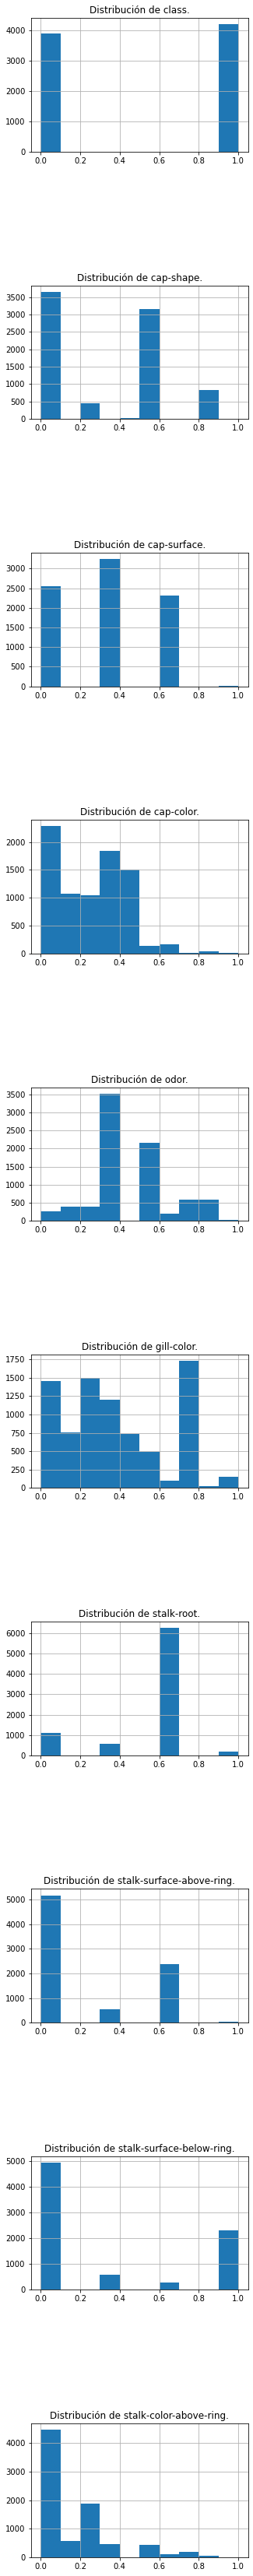

In [64]:
data_ = df_pca
columnas = data_.columns.values
fig, axs = plt.subplots(data_.shape[1], 1, figsize = (5,60))
plt.subplots_adjust(hspace = 1)
for i, c in enumerate(columnas):
    dist_datos = data_[c]
    axs[i].set_title(f'Distribución de {c}.')
    axs[i].hist(dist_datos)
    axs[i].grid(True)

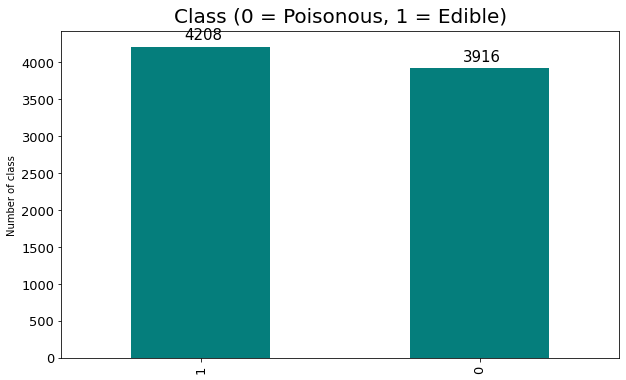

In [65]:
ax = df_pca['class'].value_counts().plot(kind ='bar',figsize=(10,6), fontsize = 13, color = '#057E7C')
ax.set_title('Class (0 = Poisonous, 1 = Edible)', size=20, pad=10)
ax.set_ylabel('Number of class')

for i in ax.patches:
    ax.text(i.get_x()+0.19, i.get_height()+100, str(round(i.get_height(),2)),fontsize =15)

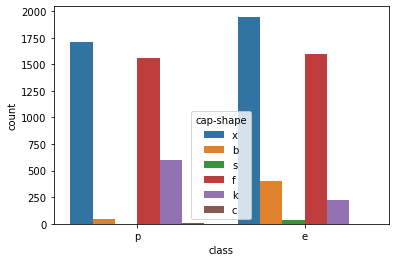

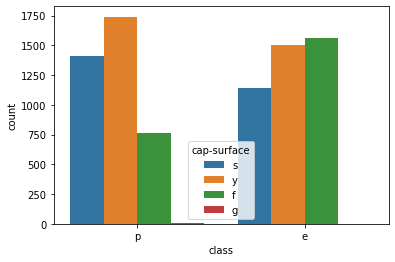

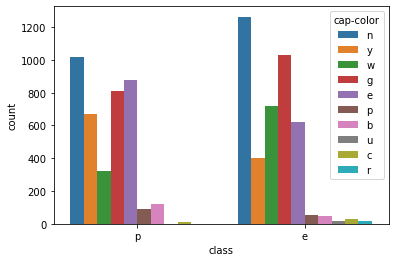

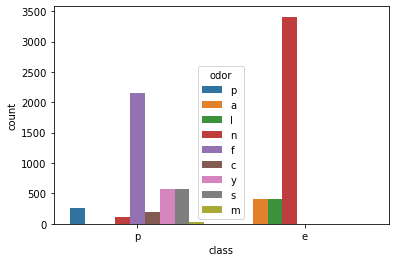

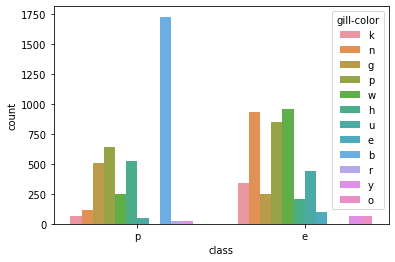

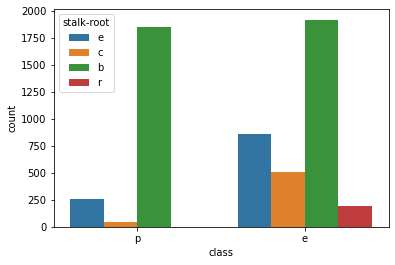

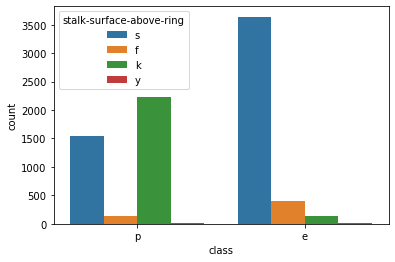

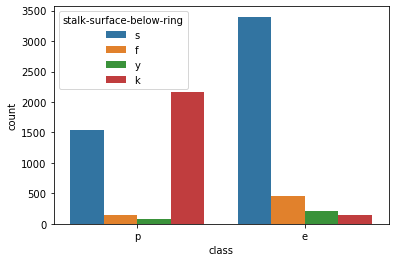

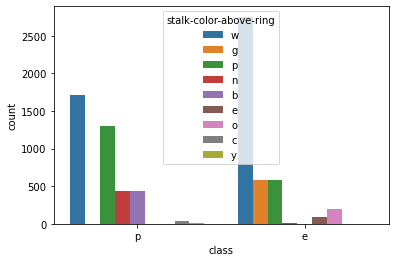

In [66]:
selected_features = df_pca.drop("class", axis=1)
selected_features_names = selected_features.columns
for column in selected_features.columns:
    sns.countplot(x='class', hue=column, data=df)
    plt.show()

#### Matriz de confusión y métricas de evaluación

In [67]:
#Función que obtiene las métricas del algoritmo para su validación
def metricas(claseP,true_train):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    #Determinar los TP,TN,FP y FN para la matriz de confusión del entrenamiento 
    for i in range(len(claseP)):
        if (true_train[i] == claseP[i]) and true_train[i] == 1:
            TP += 1
        elif (true_train[i] == claseP[i]) and true_train[i] == 0:
            TN += 1
        elif (true_train[i] != claseP[i]) and true_train[i] == 0:
            FP += 1
        else:
            FN += 1
            
    accuracy = ((TP+TN)/(TP+TN+FP+FN))
   
    if TP + FP != 0:
        precision = TP/(TP+FP)
    else:
        precision = 0
    if TP + FN != 0:
        sensitividad = TP/(TP+FN)
    else:
        sensitividad = 0
    if precision != 0 and sensitividad != 0:
        f1 = (2*TP)/(2*TP+FP+FN)
    else:
        f1 = 0
    return [accuracy, precision, sensitividad, f1]

In [3]:
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0 
	for i in range(len(row1)-1):										#for k in range(23)
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

In [4]:
def get_neighbors(k,distances_ord):
    neighbors = list()
    indices = list()
    for i in range(k):
        neighbors.append(distances_ord[i][0])
        indices.append(distances_ord[i][1])
    return neighbors,indices

In [5]:
def most_common(output_values):
    return max(set(output_values), key=output_values.count)

In [6]:
#entrenamiento del modelo
def predict_classification(x,y, k):
    predict = []
    for j in tqdm(range(0,len(x))):
        # Inicializacion de las distancias.
        distances = []
        x = np.array(x)
        for i ,example in enumerate(x):
            distance = euclidean_distance(example,x[j])# Calculate the Euclidean distance between two vectors
            distances.append((distance, i))
        distances.pop(j)
        distances_ord = sorted(distances)
        neighbors,indices = get_neighbors(k,distances_ord)
        output_values = y.iloc[indices]
        output_values = output_values.to_numpy().tolist()
        predict.append(most_common(output_values))
    return predict

## Clasificación KNN con PCA

In [7]:
error_rate = []

n = int(len(train_x)/20)
for k in range(2,10):
    pred_i = predict_classification(train_x.values.tolist(),train_y,k) 
    #print(pred_i)
    error_rate.append(np.mean(pred_i != train_y))

NameError: name 'train_x' is not defined

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
inicio = time.time()
train_pred = predict_classification(train_x.values.tolist(),train_y,5)
final = time.time()
print('Tiempo de entrenamiento:' + str(final-inicio))

In [ ]:
accuracy, precision, sensitividad, f1 = metricas(train_pred,np.array(train_y))

print('Exactitud: ',accuracy)
print('Precisión: ',precision)
print('Sensitividad: ',sensitividad)
print('F1 Score: ',f1)

In [ ]:
y_pred_1= predict_classification(test_x.values.tolist(),test_y,5)

In [ ]:
accuracy, precision, sensitividad, f1 = metricas(y_pred_1,np.array(test_y))

print('Exactitud: ',accuracy)
print('Precisión: ',precision)
print('Sensitividad: ',sensitividad)
print('F1 Score: ',f1)

## Clasificación KNN SIN PCA

In [ ]:
error_rate = []

n = int(len(x_train)/20)
for k in range(2,10):
    pred_i = predict_classification(x_train.values.tolist(),y_train,k) 
    #print(pred_i)
    error_rate.append(np.mean(pred_i != y_train))

In [ ]:
error_rate

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(2,10),error_rate,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
inicio = time.time()
train_pred = predict_classification(x_train.values.tolist(),y_train,5)
final = time.time()
print('Tiempo de entrenamiento:' + str(final-inicio))

In [ ]:
accuracy, precision, sensitividad, f1 = metricas(train_pred,np.array(y_train))

print('Exactitud: ',accuracy)
print('Precisión: ',precision)
print('Sensitividad: ',sensitividad)
print('F1 Score: ',f1)

In [ ]:
y_pred_2= predict_classification(x_test.values.tolist(),y_test,5)

In [ ]:
accuracy, precision, sensitividad, f1 = metricas(y_pred_2,np.array(y_test))

print('Exactitud: ',accuracy)
print('Precisión: ',precision)
print('Sensitividad: ',sensitividad)
print('F1 Score: ',f1)

## Clasificación KNN con PCA + kfold 

In [ ]:
def entrenamiento(x_,y_,n):
    error_rate = []
    mejor_k = []

    for k in tqdm(range(2,n+1)):
        pred_i = predict_classification(x_train.values.tolist(),y_train,k) 
        mejor_k.append(k)
        error_rate.append(np.mean(pred_i != y_train))
    e = pd.DataFrame(error_rate)
    e_min = e.min()[0]
    idx_k = error_rate.index(e_min)
    best_k_value = mejor_k[idx_k]
    print(mejor_k)

    plt.figure(figsize=(10,6))
    plt.plot(mejor_k,error_rate,color='blue', linestyle='dashed', marker='o',
    markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    return best_k_value, mejor_k

In [ ]:
def accuracy(ycalculada, yreal):
    coincidencias = np.equal(ycalculada, yreal)
    totalcoin = np.sum(coincidencias)
    porcentaje = (totalcoin/len(ycalculada))*100
    return porcentaje

In [ ]:
def kfold(x,y,k,i):
    section = int(len(x)/k)
    x_test = x.iloc[i * section : (i+1) * section, :]
    x_train = x_.drop([i * section,((i+1) * section)-1 , 1],axis=0)

    y_test = y.iloc[i * section : (i+1) * section]
    y_train = y_.drop([i * section,((i+1) * section)-1 , 1],axis=0)

    return x_test, y_test, x_train, y_train

#### Kfold 5

In [ ]:
acc_kf_s_test = 0.0
acc_kf_test = 0.0
pre_kf_s_test = 0.0
pre_kf_test = 0.0
sens_kf_s_test = 0.0
sens_kf_test = 0.0
f1_kf_s_test = 0.0
f1_kf_test = 0.0
i = 0
k_ = 5 

for i in tqdm(range(k_)):
    _x_test, _y_test, _x_train, _y_train = kfold(x_, y_, k_, i)
    print('Total de datos en x_train:',len(_x_train))
    print('Total de datos en x_test:',len(_x_test))

    k_knn, k_list = entrenamiento(_x_train, _y_train,5)
    y_pred_test = predict_classification(_x_test, _y_test,k_knn)
    print('K en cuestión:',i+1)
    print('best_k_value:',k_knn)
    
    acc_kf_test, pre_kf_test, sens_kf_test, f1_kf_test = metricas(y_pred_test,np.array(_y_test))
    acc_kf_s_test += acc_kf_test
    pre_kf_s_test += pre_kf_test
    sens_kf_s_test += sens_kf_test
    f1_kf_s_test += f1_kf_test

In [ ]:
print('Exacitud kfold-cross:', acc_kf_s_test/k_)
print('Precisión kfold-cross:', pre_kf_s_test/k_)
print('Sensitividad kfold-cross:', sens_kf_s_test/k_)
print('F1 Score kfold-cross:', f1_kf_s_test/k_)

#### Kfold 10

In [ ]:
acc_kf_s_test = 0.0
acc_kf_test = 0.0
pre_kf_s_test = 0.0
pre_kf_test = 0.0
sens_kf_s_test = 0.0
sens_kf_test = 0.0
f1_kf_s_test = 0.0
f1_kf_test = 0.0
i = 0
k_ = 10

for i in tqdm(range(k_)):
    _x_test, _y_test, _x_train, _y_train = kfold(x_, y_, k_, i)
    print('Total de datos en x_train:',len(_x_train))
    print('Total de datos en x_test:',len(_x_test))

    k_knn, k_list = entrenamiento(_x_train, _y_train,5)
    y_pred_test = predict_classification(_x_test,_y_test,k_knn)
    print('K en cuestión:',i+1)
    print('best_k_value:',k_knn)
    acc_kf_test, pre_kf_test, sens_kf_test, f1_kf_test = metricas(y_pred_test,np.array(_y_test))
    acc_kf_s_test += acc_kf_test
    pre_kf_s_test += pre_kf_test
    sens_kf_s_test += sens_kf_test
    f1_kf_s_test += f1_kf_test 

In [ ]:
print('Exacitud kfold-cross:', acc_kf_s_test/k_)
print('Precisión kfold-cross:', pre_kf_s_test/k_)
print('Sensitividad kfold-cross:', sens_kf_s_test/k_)
print('F1 Score kfold-cross:', f1_kf_s_test/k_)

# Regresión Logística

In [57]:
def regre_logist(x, y, theta, alpha, epocas,tolerance):
    iterations = 1
    for i in tqdm(range(epocas)):
        Z = np.dot(x,theta)
        ft = 1 / (1 + np.exp(-Z))
        dJ = (1/len(x)) * np.dot(np.transpose(x),(ft - y))
        mse.append(MSE(x, y, theta))
        vc.append(cross_entropy(x, y, theta))
        new_theta = theta - alpha * dJ
        #n_theta = [item for lista in new_theta for item in lista]
        it.append(iterations)
        # Stopping Condition
        if np.sum(abs(new_theta - theta)) < tolerance:
            print('Gradient Descent has converged')
            break    
        iterations += 1
        theta = new_theta    
    return theta, it,mse,vc

In [58]:
def clasificacion(x,theta):
    Z = np.dot(x,theta)
    ft = 1 / (1 + np.exp(-Z))
    clas = np.round(ft)
    return clas

In [59]:
def accuracy(ycalculada, yreal):
    coincidencias = np.equal(ycalculada, yreal)
    totalcoin = np.sum(coincidencias)
    porcentaje = (totalcoin/len(ycalculada))*100
    return porcentaje

In [60]:
def MSE(x, y, theta):
    h = np.dot(x,theta)
    J = np.sum((h-y)**2)/(2 * (len(h)))
    return J

In [61]:
def cross_entropy(x, y, theta):
    z = np.dot(x,theta)
    p = 1 / (1 + np.exp(-z))
    J = - np.mean(y*np.log(p) + (1-y)*np.log(1-p)) #Cross-entropy cost function
    return J

In [62]:
train_Y = np.expand_dims(train_y,axis = 1)
train_Y.shape

NameError: name 'train_y' is not defined

In [79]:
test_Y = np.expand_dims(test_y,axis = 1)
test_Y.shape

(1625, 1)

In [80]:
train_X = np.array(train_x)

In [81]:
alpha = 0.03
epocas = 100
datos1 = df_n.drop(['class'],axis=1) #Eliminando el atributo de decisión 
theta = (np.random.rand(datos1.shape[1],1))
#print(theta)
it = []
mse = []
vc =[]
tolerance = 1e-3 
print(theta)
start_time = time.time()
theta_f,it,mse,vc = regre_logist(train_X, train_Y, theta, alpha, epocas,tolerance)
final = time.time()
print('Tiempo de entrenamiento:' + str(final-inicio))

[[0.65780631]
 [0.92555387]
 [0.18152943]
 [0.79814484]
 [0.60538128]
 [0.27616129]
 [0.94877678]
 [0.5717576 ]
 [0.03336531]
 [0.14484586]
 [0.63108762]
 [0.38049455]
 [0.5566263 ]
 [0.21154883]
 [0.03153472]
 [0.55176745]
 [0.13249186]
 [0.7036721 ]
 [0.97488356]
 [0.42665094]
 [0.66233893]
 [0.57977482]]


  0%|          | 0/100 [00:00<?, ?it/s]


ValueError: shapes (6499,9) and (22,1) not aligned: 9 (dim 1) != 22 (dim 0)

Text(0, 0.5, 'MSE')

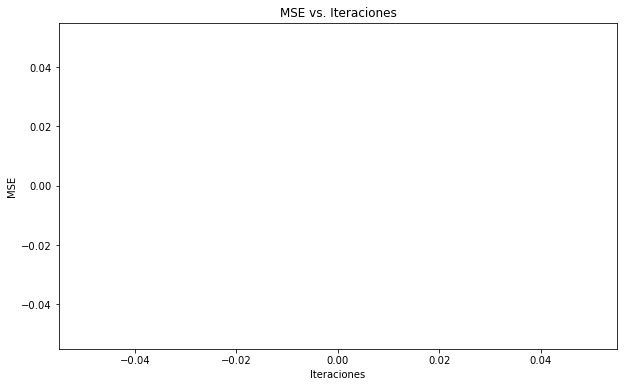

In [82]:
plt.figure(figsize=(10,6))
plt.plot(it,mse,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('MSE vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(it,vc,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('Cross entropy vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Cross entropy')

In [ ]:
yfinal = clasificacion(test_x, theta_f)
accuracy_final = accuracy(yfinal, test_Y)
print('Exactitud de test:',accuracy_final)
loss = MSE(test_x, yfinal, theta_f)
print('MSE:',loss)
loss = cross_entropy(test_x, yfinal, theta_f)
print('Cross entropy:',loss)

In [ ]:
accuracy, precision, sensitividad, f1 = metricas(yfinal,np.array(test_Y))

print('Exactitud: ',accuracy)
print('Precisión: ',precision)
print('Sensitividad: ',sensitividad)
print('f1 Score: ',f1)

In [ ]:
alpha = 0.3
epocas = 100
datos1 = df_n.drop(['class'],axis=1) #Eliminando el atributo de decisión 
theta = (np.random.rand(datos1.shape[1],1))
#print(theta)
it = []
mse = []
vc =[]
tolerance = 1e-3 
print(theta)
start_time = time.time()
theta_f,it,mse,vc = regre_logist(train_X, train_Y, theta, alpha, epocas,tolerance)
final = time.time()
print('Tiempo de entrenamiento:' + str(final-inicio))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(it,mse,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('MSE vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(it,vc,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('Cross entropy vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Cross entropy')

In [ ]:
yfinal = clasificacion(test_x, theta_f)
accuracy_final = accuracy(yfinal, test_Y)
print('Exactitud de test:',accuracy_final)
loss = MSE(test_x, yfinal, theta_f)
print('MSE:',loss)
loss = cross_entropy(test_x, yfinal, theta_f)
print('Cross entropy:',loss)

In [ ]:
accuracy, precision, sensitividad, f1 = metricas(yfinal,np.array(test_Y))

print('Exactitud: ',accuracy)
print('Precisión: ',precision)
print('Sensitividad: ',sensitividad)
print('f1 Score: ',f1)

In [ ]:
alpha = 0.06
epocas = 100
datos1 = df_n.drop(['class'],axis=1) #Eliminando el atributo de decisión 
theta = (np.random.rand(datos1.shape[1],1))
#print(theta)
it = []
mse = []
vc =[]
tolerance = 1e-3 
print(theta)
start_time = time.time()
theta_f,it,mse,vc = regre_logist(train_X, train_Y, theta, alpha, epocas,tolerance)
final = time.time()
print('Tiempo de entrenamiento:' + str(final-inicio))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(it,mse,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('MSE vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(it,vc,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('Cross entropy vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Cross entropy')

In [ ]:
yfinal = clasificacion(test_x, theta_f)
accuracy_final = accuracy(yfinal, test_Y)
print('Exactitud de test:',accuracy_final)
loss = MSE(test_X, yfinal, theta_f)
print('MSE:',loss)
loss = cross_entropy(test_x, yfinal, theta_f)
print('Cross entropy:',loss)

In [ ]:
accuracy, precision, sensitividad, f1 = metricas(yfinal,np.array(test_Y))

print('Exactitud: ',accuracy)
print('Precisión: ',precision)
print('Sensitividad: ',sensitividad)
print('f1 Score: ',f1)

In [ ]:
alpha = 0.6
epocas = 100
datos1 = df_n.drop(['class'],axis=1) #Eliminando el atributo de decisión 
theta = (np.random.rand(datos1.shape[1],1))
#print(theta)
it = []
mse = []
vc =[]
tolerance = 1e-3 
print(theta)
start_time = time.time()
theta_f,it,mse,vc = regre_logist(train_X, train_Y, theta, alpha, epocas,tolerance)
final = time.time()
print('Tiempo de entrenamiento:' + str(final-inicio))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(it,mse,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('MSE vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('MSE')

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(it,vc,color='blue', linestyle='dashed',
markerfacecolor='red', markersize=10)
plt.title('Cross entropy vs. Iteraciones')
plt.xlabel('Iteraciones')
plt.ylabel('Cross entropy')

In [ ]:
yfinal = clasificacion(test_x, theta_f)
accuracy_final = accuracy(yfinal, test_Y)
print('Exactitud de test:',accuracy_final)
loss = MSE(test_x, yfinal, theta_f)
print('MSE:',loss)
loss = cross_entropy(test_x, yfinal, theta_f)
print('Cross entropy:',loss)

In [ ]:
accuracy, precision, sensitividad, f1 = metricas(yfinal,np.array(test_Y))

print('Exactitud: ',accuracy)
print('Precisión: ',precision)
print('Sensitividad: ',sensitividad)
print('f1 Score: ',f1)

# Árbol de Decisión

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot

#### Intento 1

In [155]:
model = DecisionTreeClassifier()
space = dict(
    criterion = ["gini","entropy"],
    max_depth = np.arange(1,11),
    max_features = [None, "auto", "sqrt", "log2"]
)
clf = GridSearchCV(model, space, n_jobs=-1, cv = 5)
clf.fit(train_x, train_y)
print("Best Parameters for Decision Tree Classifier:\n{}".format(clf.best_params_))

Best Parameters for Decision Tree Classifier:
{'criterion': 'gini', 'max_depth': 10, 'max_features': None}


In [163]:
final_model = DecisionTreeClassifier(criterion='gini',max_depth= 5, max_features= None)
inicio = time.time()
final_model.fit(train_x, train_y)
final = time.time()
print('Tiempo de entrenamiento:' + str(final-inicio))
print("Test Accuracy Score : {:.4f}".format(final_model.score(test_x,test_y)))

Tiempo de entrenamiento:0.0
Test Accuracy Score : 0.9931


In [160]:
pd.DataFrame(list(zip(train_x.columns, final_model.feature_importances_)), columns = ['features', 'importance']).sort_values('importance', ascending = False)

,features,importance
3,odor,0.973385
2,cap-color,0.011730
4,gill-color,0.010582
6,stalk-surface-above-ring,0.002308
1,cap-surface,0.001996
0,cap-shape,0.000000
5,stalk-root,0.000000
7,stalk-surface-below-ring,0.000000
8,stalk-color-above-ring,0.000000


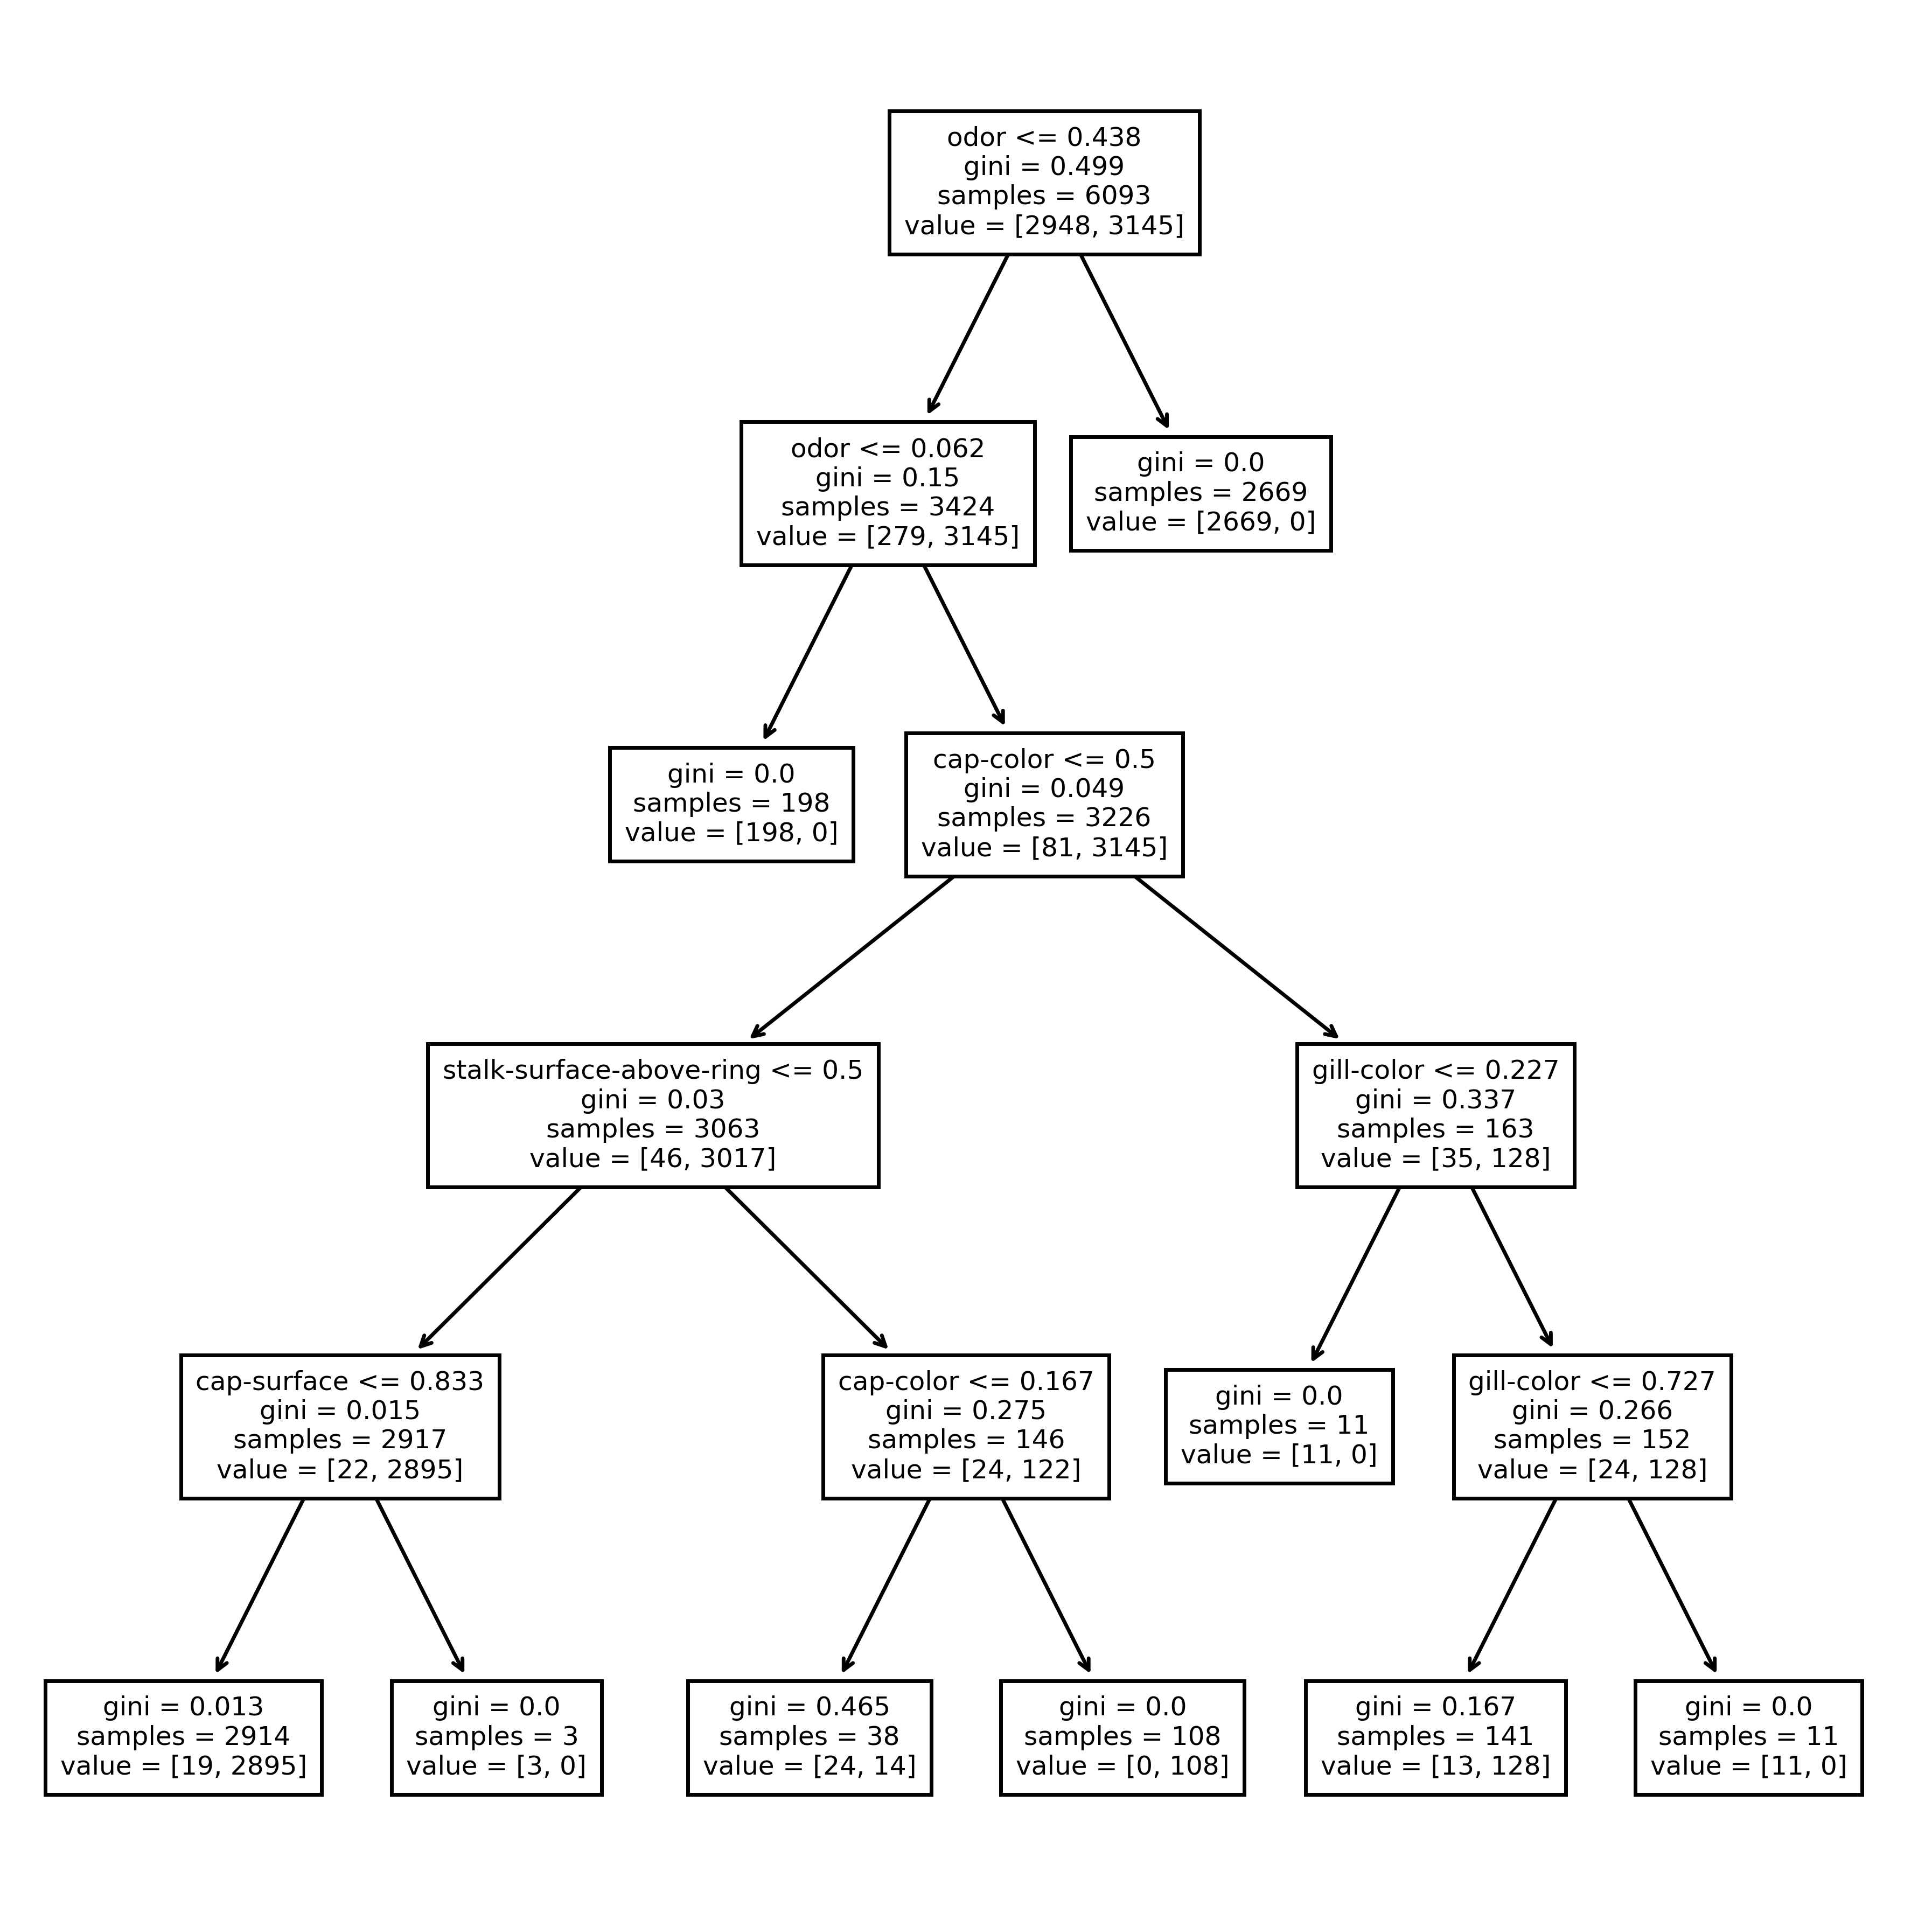

In [162]:
fig, axes = plt.subplots(figsize = (9,9), dpi=500)
tree.plot_tree(final_model, feature_names = train_x.columns, fontsize=7)
plt.show()

In [165]:
predtree = final_model.predict(test_x)
accuracy, precision, sensitividad, f1 = metricas(predtree,np.array(test_y))

print('Exactitud: ',accuracy)
print('Precisión: ',precision)
print('Sensitividad: ',sensitividad)
print('F1 Score: ',f1)

Exactitud:  0.9931068439192516
Precisión:  0.9888164026095061
Sensitividad:  0.9981185324553151
F1 Score:  0.9934456928838952


#### Intento 2

In [100]:
parameters = {'criterion':('gini', 'entropy'), 
              'min_samples_split':[2,3,4,5], 
              'max_depth':[8,9,10,11,12],
              'class_weight':('balanced', None),
             }

In [101]:
mushroom_tree =tree.DecisionTreeClassifier()

In [107]:
gsearch = GridSearchCV(mushroom_tree, parameters)
inicio = time.time()
gsearch.fit(train_x, train_y)
final = time.time()
print('Tiempo de entrenamiento:' + str(final-inicio))
model = gsearch.best_estimator_
model

Tiempo de entrenamiento:5.3424718379974365


DecisionTreeClassifier(class_weight='balanced', max_depth=10)

In [108]:
predtree = model.predict(test_x)

In [109]:
accuracy, precision, sensitividad, f1 = metricas(predtree,np.array(test_y))

print('Exactitud: ',accuracy)
print('Precisión: ',precision)
print('Sensitividad: ',sensitividad)
print('f1 Score: ',f1)

Exactitud:  0.9960610536681438
Precisión:  0.992530345471522
Sensitividad:  1.0
f1 Score:  0.9962511715089035


#### Intento 3

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot

In [111]:
mushroom_tree = DecisionTreeClassifier(criterion='entropy',class_weight='balanced', max_depth=10)

Tiempo de entrenamiento:0.25438785552978516


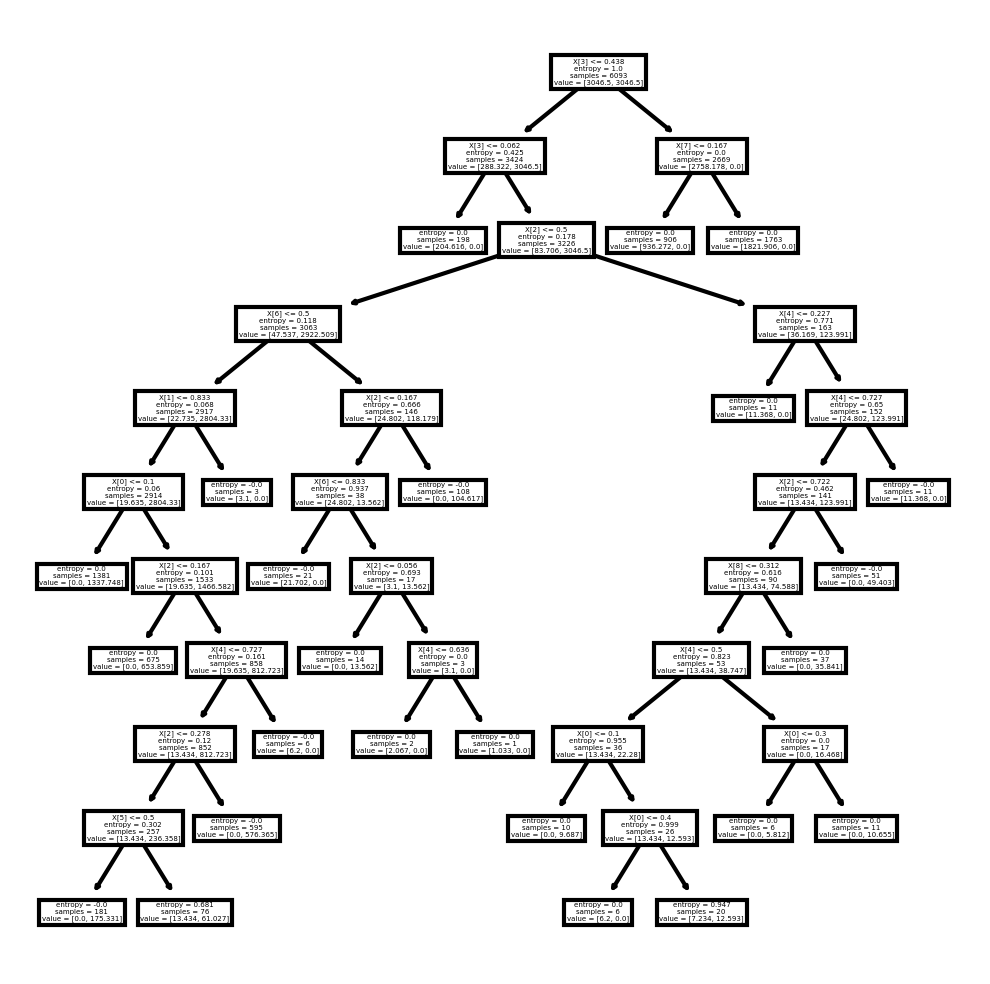

In [118]:
inicio = time.time()
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(mushroom_tree.fit(train_x,train_y))
final = time.time()
print('Tiempo de entrenamiento:' + str(final-inicio))

In [119]:
predtree = mushroom_tree.predict(test_x)

In [120]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Precisión de los Arboles de Decisión: ", metrics.accuracy_score(test_y, predtree))

Precisión de los Arboles de Decisión:  0.9960610536681438


In [121]:
accuracy, precision, sensitividad, f1 = metricas(predtree,np.array(test_y))

print('Exactitud: ',accuracy)
print('Precisión: ',precision)
print('Sensitividad: ',sensitividad)
print('F1 Score: ',f1)

Exactitud:  0.9960610536681438
Precisión:  0.992530345471522
Sensitividad:  1.0
F1 Score:  0.9962511715089035


# MLP

In [182]:
from numpy.core.numeric import zeros_like

In [183]:
class capa_neuronal():
    def __init__(self, num_entradas, num_neuronas, funcion_activacion):
        self.funcion_activacion = funcion_activacion
        self.bias = np.random.rand(1, num_neuronas) * 2 - 1
        self.w = np.random.rand(num_entradas, num_neuronas) * 2 - 1

In [184]:
def compilar_red(neuronas_por_capa, funcion_activacion):
    red_neuronal = []
    for n, capa in enumerate(neuronas_por_capa[:-1]):
        red_neuronal.append(capa_neuronal(neuronas_por_capa[n], neuronas_por_capa[n + 1], funcion_activacion))
    return red_neuronal

In [198]:
def entrenar_red(x, y, red_neuronal, sigmoide_derivada, l2_derivada):
    salidas = [(None, x)]
    for n, capa in enumerate(red_neuronal):
        I = np.dot(salidas[-1][1], red_neuronal[n].w) + red_neuronal[n].bias
        _y = red_neuronal[n].funcion_activacion(I)
        salidas.append((I, _y))
    deltas = []
    for n in reversed(range(0, len(red_neuronal))):
        I = salidas[n + 1][0]
        _y = salidas[n + 1][1]
        if n == len(red_neuronal) - 1:
            deltas.insert(0, l2_derivada(_y, y) * sigmoide_derivada(_y))
        else:
            deltas.insert(0, np.dot(deltas[0], _w.T) * sigmoide_derivada(_y))
        _w = red_neuronal[n].w

        red_neuronal[n].bias = red_neuronal[n].bias - (np.mean(deltas[0],
                                                            axis = 0,
                                                            keepdims = True) * 
                                                 learning_rate)
        red_neuronal[n].w = red_neuronal[n].w - (np.dot(salidas[n][1].T, deltas[0]) *
                                                 learning_rate) 

        return salidas[-1][1]

In [199]:
def precision_mlp(m_entrenamiento, m_esperada):
    m1 = np.round(m_entrenamiento)
    m1[:,0] = m1[:,0]*1000
    m1[:,1] = m1[:,1]*100
    #m1[:,2] = m1[:,2]*10
    m1 = np.sum(m1, axis=1)
    m2 = zeros_like(m_esperada)
    np.copyto(m2, m_esperada)
    m2[:,0] = m2[:,0]*1000
    m2[:,1] = m2[:,1]*100
    #m2[:,2] = m2[:,2]*10
    m2 = np.sum(m2, axis=1)
    errores = []
    for v1, v2 in zip(m1,m2):
        if v1 == v2: errores.append(0)
        else: errores.append(1)
    porcentaje = 100 * sum(errores) / len(errores)
    return sum(errores), porcentaje

In [200]:
def predecir(x, red_neuronal):
    salidas = [(None, x)]
    for n, capa in enumerate(red_neuronal):
        I = np.dot(salidas[-1][1], red_neuronal[n].w) + red_neuronal[n].bias
        _y = red_neuronal[n].funcion_activacion(I)
        salidas.append((I, _y))
    return salidas[-1][1]

In [201]:
from tensorflow.keras.utils import to_categorical

In [202]:
# Funciones de activación
sigmoide = lambda x: 1 / (1 + np.e ** (-x))
sigmoide_derivada = lambda x: x * (1 - x)
relu = lambda x: x if x > 0 else 0
relu_derivada = lambda x: 0 if x <= 0 else x

In [203]:
# Funciones de coste
l2 = lambda y, y1: np.mean((y - y1) ** 2)
l2_derivada = lambda y, y1: (y - y1)

In [204]:
learning_rate = 0.1
epocas_entrenamiento = 30000
neuronas_por_capa = [22,12, 6, 3, 2]

In [205]:
y_mlp_train = to_categorical(train_y)

In [206]:
y_mlp_test = to_categorical(test_y)

In [207]:
red_neuronal = compilar_red(neuronas_por_capa, sigmoide)

In [208]:
historial_l2 = []
for i in tqdm(range(epocas_entrenamiento)):
    y_entrenamiento_1 = entrenar_red(x_train, y_mlp_train, red_neuronal, sigmoide_derivada,
                           l2_derivada)
    historial_l2.append(l2(y_entrenamiento_1, y_mlp_train))

100%|██████████| 30000/30000 [01:38<00:00, 303.30it/s]


In [209]:
y_entrenamiento_1 = np.round(y_entrenamiento_1)

In [210]:
num_errores, por100 = precision_mlp(y_entrenamiento_1, y_mlp_train)
print(f'Se obtuvo {100-por100}% de precisión con un total de {num_errores} errores.')

Se obtuvo 56.947222649638405% de precisión con un total de 2798 errores.


<function matplotlib.pyplot.show(close=None, block=None)>

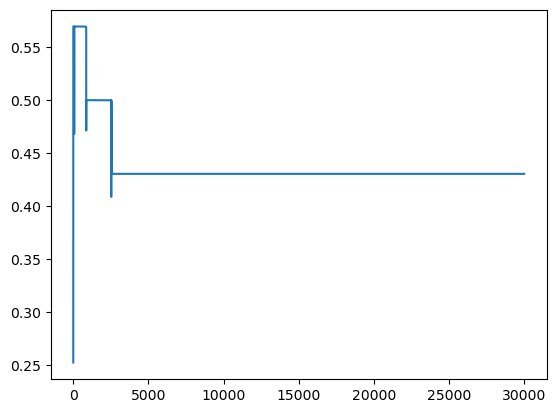

In [211]:
plt.plot(historial_l2)
plt.show

In [212]:
y_predict_m = predecir(test_x, red_neuronal)
np.round(y_predict_m)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [213]:
m_errores, por100 = precision_mlp(y_predict_m, y_mlp_test)
print(f'Se obtuvo {100-por100}% de precisión con un total de {num_errores} errores.')

Se obtuvo 31.200000000000003% de precisión con un total de 2798 errores.


# Kmeans ++

In [239]:
from itertools import permutations

In [240]:
class KMeans_plus:
    def __init__(self, n_cluster=3):
        self.n_cluster = n_cluster
        #self.random_state = random_state

    def fit(self, dataset):
        self.x_data = dataset.iloc[:, 0]
        self.y_data = dataset.iloc[:, 1]        
        self.X = dataset.iloc[:, [0, 1]]  # not use feature labels
        self.m = self.X.shape[0]  # number of training examples
        self.n = self.X.shape[1]  # number of features.
        self.initial_centroids = []

        first_cen = self.get_random_centroid()
        initial_centroids = self.select_the_others_centroid(first_cen)

        self.plot_initial_centroids(initial_centroids)
        c = self.clustering(initial_centroids)
        return c


    def get_random_centroid(self):
        return np.random.randint(len(self.x_data))
        
    def select_the_others_centroid(self, first_cen):
        self.initial_centroids.append((self.x_data[first_cen], self.y_data[first_cen]))
        for i in range(self.n_cluster - 1):
            dis_max = 0
            index_max = 0
            for j in range(len(self.x_data)):
                if j != first_cen and (self.x_data[j], self.y_data[j]) not in self.initial_centroids:
                    dis_temp = 0
                    for k in self.initial_centroids:
                        pt1 = k
                        pt2 = (self.x_data[j], self.y_data[j])
                        dis_temp += self.euclidean_distance(pt1, pt2)
                    if dis_temp > dis_max:
                        dis_max = dis_temp
                        index_max = j
            self.initial_centroids.append((self.x_data[index_max], self.y_data[index_max]))    
        #print(self.initial_centroids)
        return np.array(self.initial_centroids)
        
    def plot_initial_centroids(self, initial_centroids):

        plt.scatter(self.X.iloc[:,0], self.X.iloc[:,1], c='#000000', s=7, label='Datos')
        plt.scatter(initial_centroids[:, 0], initial_centroids[:, 1], marker='*', s=120, c='r', label='Centroides Iniciales')
        plt.title('Algoritmo de K-Means++')
        plt.xlabel('Atributo 1')
        plt.ylabel('Atributo 2')
        plt.legend()
        plt.draw()

 
    def clustering(self, centroids):

        old_centroids = np.zeros(centroids.shape)
        stopping_criteria = 0.0001
        self.iterating_count = 0
        self.objective_func_values = []

        while self.euclidean_distance(old_centroids, centroids) >= stopping_criteria:
            clusters = np.zeros(len(self.X))
            C = []
            # Assigning each value to its closest cluster
            for i in range(self.m):
                distances = []
                for j in range(len(centroids)):
                    distances.append(self.euclidean_distance(self.X.iloc[i, :], centroids[j]))
                cluster = np.argmin(distances)
                clusters[i] = cluster

            # Storing the old centroid values to compare centroid moves
            old_centroids = centroids.copy()

            # Finding the new centroids
            for i in range(self.n_cluster):
                points = [self.X.iloc[j, :] for j in range(len(self.X)) if clusters[j] == i]
                centroids[i] = np.mean(points, axis=0)

            # calculate objective function value for current cluster centroids
            self.objective_func_values.append([self.iterating_count, self.objective_func_calculate(clusters, centroids)])
            self.plot_centroids(centroids, clusters)
            self.iterating_count += 1

        self.plot_objective_function_values()
        return centroids
    
    def predict(self, centroids,X):
        self.D = X.iloc[:, [0, 1]]  # not use feature labels
        self.b = self.D.shape[0]  # number of training examples
        clusters = np.zeros(len(self.D))
        C = []
        # Assigning each value to its closest cluster
        for i in range(self.b):
            distances = []
            for j in range(len(centroids)):
                distances.append(self.euclidean_distance(self.D.iloc[i, :], centroids[j]))
            cluster = np.argmin(distances)
            clusters[i] = cluster

        # calculate objective function value for current cluster centroids
        #C = self.plot_centroids(centroids, clusters)
        return clusters   
    
    def plot_centroids(self, centroids, clusters):
        colors = ["#4C72B0", "#DD8452", "#55A868", "#C44E52", "#8172B3",
          "#937860", "#DA8BC3", "#8C8C8C", "#CCB974", "#64B5CD"]
        fig, ax = plt.subplots()
        for i in range(self.n_cluster):
            points = np.array([self.X.iloc[j, :] for j in range(len(self.X)) if clusters[j] == i])
            ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i], label='Cluster {}'.format(i + 1))
        
        ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=120, c='#000000', label='Centroides')

        plt.title('Algoritmo de K-Means++\n( Número de Iteración = {} , Valor de la función objetivo = {:.2f} )'
                  .format((self.iterating_count + 1), np.array(self.objective_func_values)[self.iterating_count, 1]))
        plt.xlabel('Atributo 1')
        plt.ylabel('Atributo 2')
        plt.legend()
        plt.draw()
        
        #print('Clusters',clusters, ' Largo:',len(clusters))
        #print('')
        return clusters 

    def euclidean_distance(self, a, b):
        return np.sqrt(np.sum((np.array(a) - np.array(b))**2))

    def objective_func_calculate(self, clusters, centroids):
        """Calcular el valor de la función objetivo para los centroides actuales"""
        distances_from_centroids = []
        for i in range(self.n_cluster):
            points = np.array([self.X.iloc[j, :] for j in range(len(self.X)) if clusters[j] == i])
            for k in range(len(points)):
                distances_from_centroids.append(self.euclidean_distance(points[k, :], centroids[i]))
        return sum(distances_from_centroids)

    def plot_objective_function_values(self):
        """Esta función traza el gráfico del valor de la función objetivo para cada iteración """

        plt.figure()
        plt.plot((np.array(self.objective_func_values)[:, 0] + 1),  np.array(self.objective_func_values)[:, 1], 'bo')
        plt.plot((np.array(self.objective_func_values)[:, 0] + 1), np.array(self.objective_func_values)[:, 1], 'k')
        plt.title('Función objetivo')
        plt.xlabel('Número de Iteración')
        plt.ylabel('Valor')
        plt.draw()

In [241]:
def accuracy(y,predictions):
    y = np.array(y)
    allPermutations = np.array(list(permutations(np.unique(y))))
    acc = []
    for perm in allPermutations:
        classes = np.arange(0,y.shape[0])
        for index in range(classes.shape[0]):
            classes[index]=np.where(y[index]== perm)[0][0]
        acc.append(np.sum(classes==predictions))
    acc = np.array(acc)
    bestAccIndex = np.where(max(acc)==acc)[0][0]
    return dict(zip(np.arange(0,allPermutations.shape[1]),allPermutations[bestAccIndex])), acc[bestAccIndex]

In [242]:
train_x_k = train_x.loc[:,['cap-shape','cap-surface']]
train_x_k =pd.DataFrame(train_x_k)
train_x_k = train_x_k.reset_index()
train_x_k = train_x_k.drop(['index'],axis=1) #Eliminando el atributo de decisión 
train_x_k

,cap-shape,cap-surface
0,0.0,0.000000
1,0.0,0.000000
2,0.2,0.000000
3,0.0,0.333333
4,0.0,0.000000
...,...,...
6494,0.6,0.333333
6495,0.6,0.333333
6496,0.6,0.000000
6497,0.6,0.000000


In [243]:
test_x_k = test_x.loc[:,['cap-shape','cap-surface']]
test_x_k =pd.DataFrame(test_x_k)
test_x_k = test_x_k.reset_index()
test_x_k = test_x_k.drop(['index'],axis=1) #Eliminando el atributo de decisión 
test_x_k

,cap-shape,cap-surface
0,0.6,0.000000
1,0.6,0.000000
2,0.8,0.333333
3,0.6,0.333333
4,0.6,0.000000
...,...,...
1620,0.8,0.000000
1621,0.0,0.000000
1622,0.6,0.000000
1623,0.8,0.333333


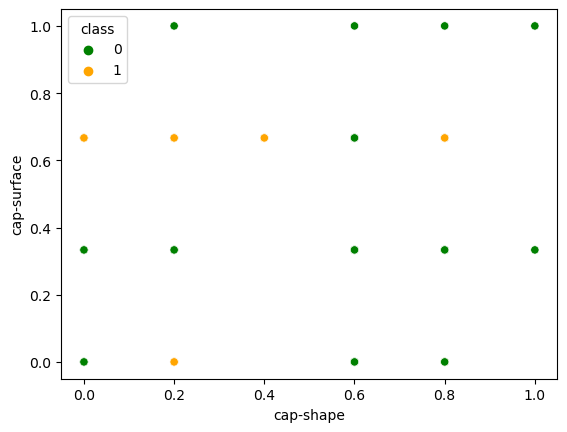

In [244]:
col_dec_train = pd.concat([train_y, train_x_k], axis=1)

plt.figure()
sns.scatterplot(x='cap-shape', y='cap-surface', data=col_dec_train, hue=col_dec_train['class'], palette=['green','orange'])
plt.xlabel('cap-shape')
plt.ylabel('cap-surface')
plt.show()

Tiempo de Ejecución: 6.7233150005 segundos.


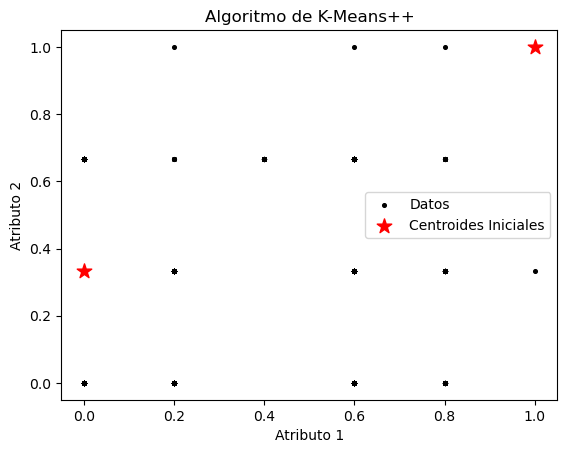

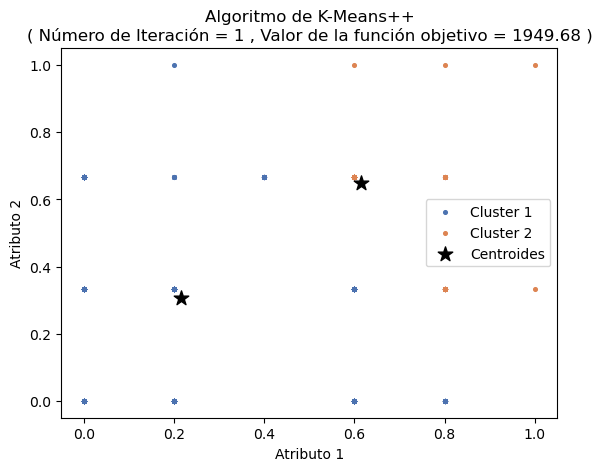

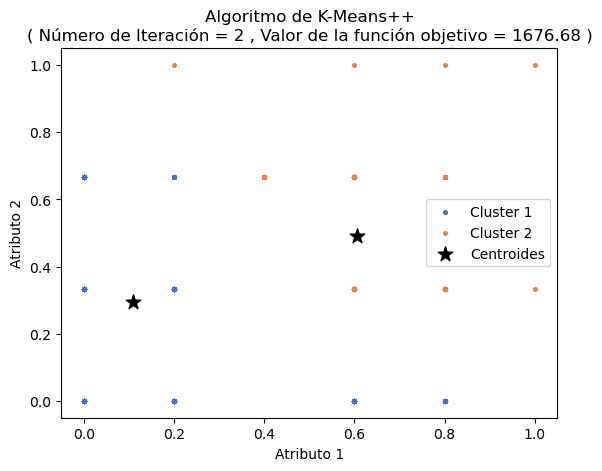

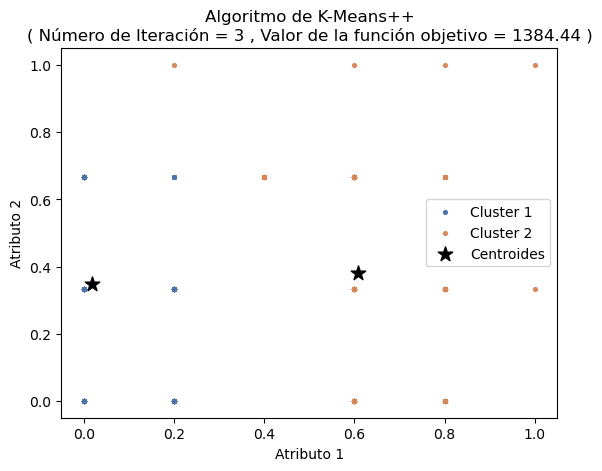

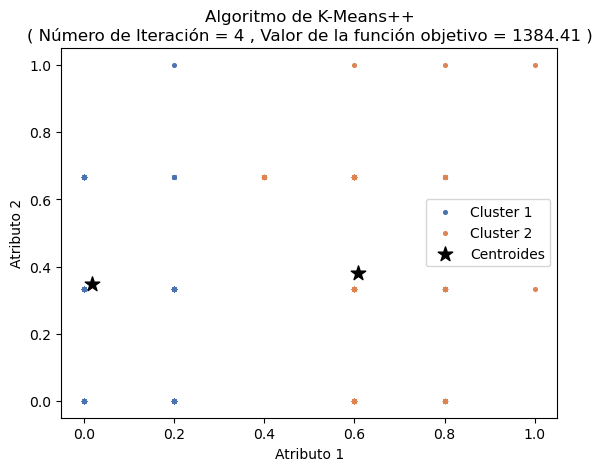

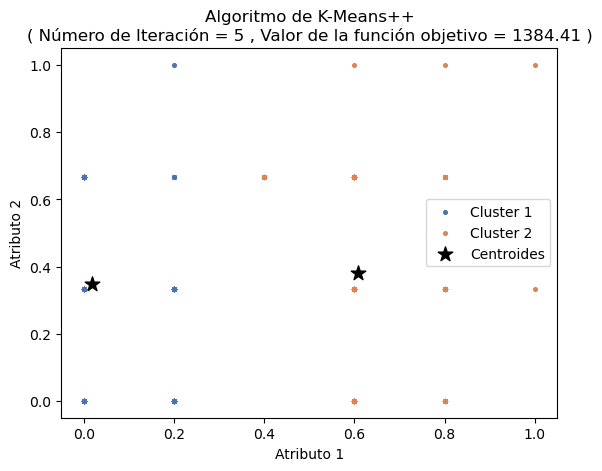

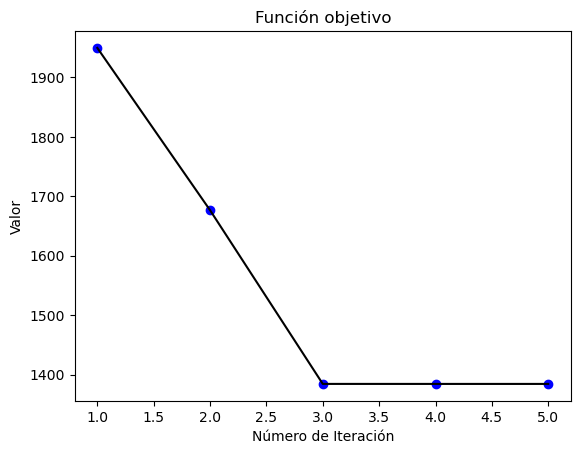

In [245]:
start_time = time.time()
kmeans2 = KMeans_plus(n_cluster=2)
centroids = kmeans2.fit(train_x_k)
elapsed_time = time.time() - start_time
print("Tiempo de Ejecución: %.10f segundos." % elapsed_time)

In [246]:
L = kmeans2.predict(centroids,test_x_k)
print(L)

[1. 1. 1. ... 1. 1. 0.]


In [247]:
Lb = pd.DataFrame(L)
dataset_kmeans = pd.concat([Lb, test_x_k], axis=1)
dataset_kmeans.set_axis(['Labels','cap-shape', 'cap-surface'], 
                    axis='columns', inplace=True)
dataset_kmeans

C:\Users\gaby9\AppData\Local\Temp\ipykernel_1688\3309557151.py:3: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  dataset_kmeans.set_axis(['Labels','cap-shape', 'cap-surface'],


,Labels,cap-shape,cap-surface
0,1.0,0.6,0.000000
1,1.0,0.6,0.000000
2,1.0,0.8,0.333333
3,1.0,0.6,0.333333
4,1.0,0.6,0.000000
...,...,...,...
1620,1.0,0.8,0.000000
1621,0.0,0.0,0.000000
1622,1.0,0.6,0.000000
1623,1.0,0.8,0.333333


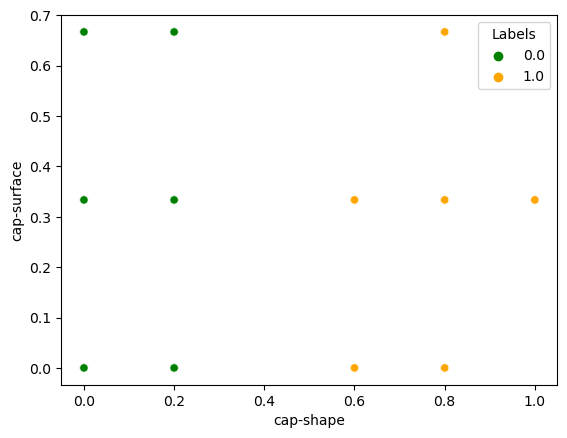

In [248]:
plt.figure()
sns.scatterplot(x='cap-shape', y='cap-surface', data=dataset_kmeans, hue=dataset_kmeans['Labels'], palette=['green','orange'])
plt.xlabel('cap-shape')
plt.ylabel('cap-surface')
plt.show()

In [249]:
classes_dict, acc = accuracy(test_y,L)
print('Orden de los grupos:', classes_dict)
print('Aciertos:',acc)
print('Porcentaje:',100*acc/test_y.shape[0],'%')

Orden de los grupos: {0: 1, 1: 0}
Aciertos: 1182
Porcentaje: 72.73846153846154 %
